In [1]:

import numpy as np

from pathlib import Path
import os
from natsort import natsorted
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

from funcs_build_msm import _tica, _kmeans, get_data 
from funcs_validate_msm import *
from funcs_sample import *
from funcs_plotting import *
from funcs_characterise import *
from paths import *

/home/rzhu/Loc/miniconda3/envs/kinase/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
protein = 'egfr'
study_name = 'markov_lag'
data_path = Path(f'data_{protein}/msm/{study_name}')
save_dir = Path(f'data_{protein}/plots/')
summary_f = data_path/f'{study_name}.h5'
hps = pd.read_hdf(summary_f, key='hps')
raw = pd.read_hdf(summary_f, key='result_raw')

In [21]:
n_score = 5 # The number of timescales to plot
columns = [f't{i+2}' for i in range(n_score)] \
        + [f'gap_{i+2}' for i in range(n_score)] \
        + [f'vamp2eq_{i+2}' for i in range(n_score)]
markov_lags = np.array(hps['markov__lag'].to_list())/20

In [22]:
summary = raw.replace([np.inf, -np.inf], np.nan)
summary.dropna(inplace=True)
summary_groupby = summary.groupby('hp_id')[columns].agg(['mean', 'std'])
summary_groupby

t2                          t3                          t4  \
               mean           std          mean           std          mean   
hp_id                                                                         
0      1.127418e+05  9.310521e+04  1.572426e+04  8.885414e+03  6.149926e+03   
1      3.429490e+05  2.889728e+05  5.526598e+04  2.481599e+04  2.450485e+04   
2      7.944679e+05  5.835716e+05  8.056479e+04  3.366750e+04  3.912286e+04   
3      3.779698e+06  3.012892e+06  3.024130e+05  1.451146e+05  1.310679e+05   
4      6.785102e+06  5.788157e+06  6.535352e+05  3.197599e+05  2.506655e+05   
5      3.107623e+07  2.905237e+07  3.078645e+06  1.418626e+06  1.191364e+06   

                                 t5                            t6  \
                 std           mean            std           mean   
hp_id                                                               
0        3557.756368    2154.955521     657.087676    1728.004970   
1       12655.616636    7585.068315    1680.292851    6337.817896   
2       23258.203482   12569.278109    2180.763809   10532.761478   
3       70363.005822   46954.615222   19819.981047   33030.161074   
4      124506.742566   73741.630079   18147.446874   53766.503795   
5      615387.989536  379766.309704  158194.763659  260873.398720   

                     ... vamp2eq_2           vamp2eq_3           vamp2eq_4  \
                std  ...      mean       std      mean       std      mean   
hp_id                ...                                                     
0        576.408360  ...  1.999946  0.000085  2.999766  0.000178  3.999276   
1       1589.142732  ...  1.999922  0.000096  2.999689  0.000204  3.999111   
2       2778.623328  ...  1.999910  0.000139  2.999612  0.000240  3.998846   
3       7760.208265  ...  1.999874  0.000198  2.999438  0.000412  3.998459   
4      12672.823753  ...  1.999867  0.000215  2.999440  0.000448  3.998454   
5      55955.237798  ...  1.999837  0.000254  2.999397  0.000485  3.998373   

                vamp2eq_5           vamp2eq_6            
            std      mean       std      mean       std  
hp_id                                                    
0      0.000535  4.998282  0.000730  5.997022  0.000916  
1      0.000605  4.997739  0.000771  5.996059  0.001002  
2      0.000789  4.997216  0.000974  5.995190  0.001213  
3      0.000933  4.996092  0.001327  5.992901  0.001793  
4      0.000892  4.995605  0.001269  5.991701  0.001814  
5      0.000896  4.995462  0.001394  5.991471  0.001875  

[6 rows x 30 columns]

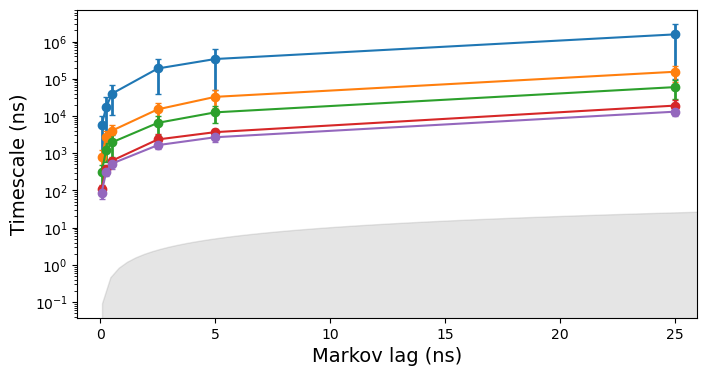

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))

for i in range(n_score):
    ax.errorbar(markov_lags, np.array(summary_groupby[f't{i+2}']['mean'].to_list())/20, 
                yerr=np.array(summary_groupby[f't{i+2}']['std'].to_list())/20, 
                marker='o', 
                label='t2',
                elinewidth=2, capsize=2, capthick=1)

ax.fill_between(np.linspace(-1, max(markov_lags)+10, 100), y1=np.linspace(-1,max(markov_lags)+10,100), color='gray', alpha=0.2)
ax.set_xlim([-1, max(markov_lags)+1])
ax.set_yscale('log')
ax.set_xlabel('Markov lag (ns)', fontsize=14)
ax.set_ylabel('Timescale (ns)', fontsize=14)

plt.savefig(save_dir / 'its.png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()